# Question 1: Vision Dataset - CIFAR-10

## 1 Import Libraries/Dataset

### a. Import required libraries

In [ ]:
# Import necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import time

### c. Check the GPU available

In [ ]:
tf.keras.backend.clear_session()
tf.config.optimizer.set_jit(False) # Start with XLA disabled.

# Check if GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### b. Import the dataset

In [ ]:
# Load CIFAR-10 dataset from Tensorflow datasets
def load_data():
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  x_train = x_train.astype('float32') / 255
  x_test = x_test.astype('float32') / 255

  # Convert class vectors to binary class matrices.
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
  return ((x_train, y_train), (x_test, y_test))

(x_train, y_train), (x_test, y_test) = load_data()

## 2 Data Visualization 

In [ ]:
# Get labels from meta file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

meta = '/content/drive/My Drive/Colab Notebooks/batches.meta'
d = unpickle(meta)
labels = d[b'label_names']
labels = [x.decode('utf-8') for x in labels]

In [ ]:
# Create collection of samples from each class
unique_labels = {}

for idx, data in enumerate(y_train):
  label = np.argmax(data)
  unique_labels[label] = idx
  if len(unique_labels) == 10:
    break

### a. Sample from each class

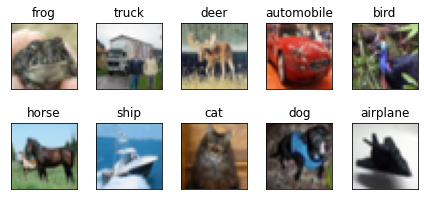

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, img_dict in zip(axs.flat, unique_labels.items()):
    ax.imshow(x_train[img_dict[1]])
    ax.set_title(labels[img_dict[0]])

plt.tight_layout()
plt.show()

### b. Shape of train and test data

In [ ]:
print(f"Train data shape is {x_train.shape}") 
print(f"Test data shape is {x_test.shape}")

Train data shape is (50000, 32, 32, 3)
Test data shape is (10000, 32, 32, 3)


## 3 Data  Pre-processing
### a. Reshaping the data into the required format

In [ ]:
x_train = x_train.reshape((50000, 32*32*3))
x_test = x_test.reshape((10000, 32*32*3))

## 4 Model Building


### a. Sequential Model layers
  * We have used 4 hidden layers. The number of nodes were adjusted after experimenting with different counts and choosing the ones with best performance.

### b. Added regularization with regularization parameter = 0.001. Adding regularization to all layers negatively impacts the accuracy hence we have used it only for 2 layers.
### c. Added dropout at layer 2. Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. It is a computationally cheap way to regularize a deep neural network.
### d. Activation functions used for each layer as 
  * layer 1 - relu
  * layer 2 - relu
  * layer 3 - relu
  * layer 4 - softmax

### e. Model summary printed

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    

    tf.keras.layers.Dense(32,kernel_regularizer = regularizers.l2(l2=0.001)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(32,kernel_regularizer = regularizers.l2(l2=0.001)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                153650    
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1632      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0

## 5. Model Compilation

### a. Model compiled with "categorical_crossentropy" as loss function.
### b. The 'Adam' optimizer is used for compilation with learning rate as 0.01. We are using the Adam optimizer because it combines the benefit of AdaGrad and RMSProp. Adam is also an adaptive gradient descent algorithm, such that it maintains a learning rate per-parameter. The higher learning rates have tendency to overshoot and miss the minima whereas too small learning rate takes too many steps to reach the minima.
### c. Accuracy is used as the metric for evaluation.

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

## 6. Model Training

### a. Model is trained with 50 epochs and batch_size = 1000. The train and validation accuracies are also printed along with execution time for each epoch.

In [ ]:
start_time = time.time()

history = model.fit(x_train, y_train, epochs = 50, batch_size = 300, validation_split = 0.1)

print(f'Total training time is {time.time() - start_time} seconds')

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 2.2149 - accuracy: 0.2140 - val_loss: 1.9420 - val_accuracy: 0.2982
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 1.9144 - accuracy: 0.3046 - val_loss: 1.8848 - val_accuracy: 0.3278
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 1.8673 - accuracy: 0.3257 - val_loss: 1.8408 - val_accuracy: 0.3308
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 1.8283 - accuracy: 0.3416 - val_loss: 1.8088 - val_accuracy: 0.3402
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 1.8026 - accuracy: 0.3505 - val_loss: 1.7707 - val_accuracy: 0.3716
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 1.7836 - accuracy: 0.3592 - val_loss: 1.7587 - val_accuracy: 0.3684
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 1.7640 - accuracy: 0.3651 - val_loss: 1.7497 - val_accuracy: 0.3642
Epoch 

### b. Plotted the loss and accuracy history
* the total training time is printed in above cell

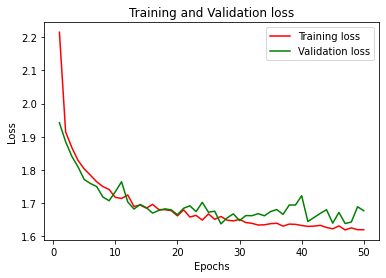

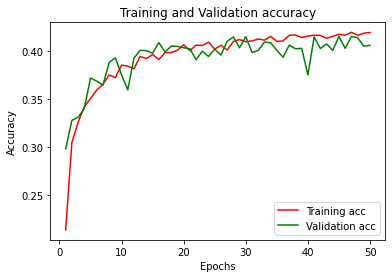

In [ ]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Model Evaluation

### a. Final training loss and accuracy for Train, Validation, and Test

In [ ]:
# Printing the total training loss and accuracy

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 1.619517207145691
Final training accuracy  0.41886666417121887


In [ ]:
# Printing the total validation loss and accuracy

print('Final Validation loss \t', history.history['val_loss'][-1])
print('Final Validation accuracy ', history.history['val_accuracy'][-1])

Final Validation loss 	 1.6767911911010742
Final Validation accuracy  0.40560001134872437


In [ ]:
# Printing the test loss and accuracy

testLoss, testAccuracy = model.evaluate( x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6650 - accuracy: 0.4029


### b. Classification Report and Confusion Matrix
Based on F1-Scores, class 8 is the best performing while class 3 is the worst performing class. From the loss and accuracy graphs we can observe that the model is performing equally well with training and validation data. The classification report shows that the overall performance of the model is decent. We have observed that accuracy improves drastically by using CNN model.

In [ ]:
y_pred = model.predict_classes(x_test)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.41      0.48      0.44       856
           1       0.42      0.62      0.50       685
           2       0.27      0.27      0.27      1005
           3       0.14      0.29      0.19       489
           4       0.40      0.32      0.35      1247
           5       0.23      0.42      0.30       547
           6       0.53      0.38      0.44      1380
           7       0.58      0.36      0.45      1592
           8       0.64      0.47      0.54      1367
           9       0.41      0.50      0.45       832

    accuracy                           0.40     10000
   macro avg       0.40      0.41      0.39     10000
weighted avg       0.45      0.40      0.41     10000



In [ ]:
print(confusion_matrix(y_pred, y_true))

[[412  45  83  15  40  21   3  42 117  78]
 [ 18 422  22  17   6  10   9   8  37 136]
 [ 94  36 267 120 149 143  86  69  29  12]
 [ 24  17  43 142  27  83  80  32  17  24]
 [ 29  15 219 110 397 119 184 131  26  17]
 [ 12  28  36 116  14 231  20  48  25  17]
 [ 31  38 140 235 153 156 527  36  29  35]
 [121  53 146 150 171 163  66 578  29 115]
 [226 146  33  51  32  54  12  20 640 153]
 [ 33 200  11  44  11  20  13  36  51 413]]


# Hyperparameter Tuning
Two new models are created with the new hyperparameters as per the instructions. 

## 1. Dropout: The dropout layer is moved after layer 3 with new dropout value of 0.2.

### Model Building

In [ ]:
Model_upd_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    

    tf.keras.layers.Dense(32,kernel_regularizer = regularizers.l2(l2=0.001)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32,kernel_regularizer = regularizers.l2(l2=0.001)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
  ])

Model_upd_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                153650    
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1632      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

### Model Compilation

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

Model_upd_dropout.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

### Model Training

In [ ]:
start_time = time.time()

history = Model_upd_dropout.fit(x_train, y_train, epochs = 50, batch_size = 300, validation_split = 0.1)

print(f'Total training time is {time.time() - start_time} seconds')

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 2.2264 - accuracy: 0.1620 - val_loss: 2.0736 - val_accuracy: 0.2078
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 2.0560 - accuracy: 0.2158 - val_loss: 2.0264 - val_accuracy: 0.2226
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 1.9828 - accuracy: 0.2539 - val_loss: 1.9182 - val_accuracy: 0.2886
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 1.9159 - accuracy: 0.2827 - val_loss: 1.8829 - val_accuracy: 0.2990
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 1.8745 - accuracy: 0.3043 - val_loss: 1.8450 - val_accuracy: 0.3210
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 1.8521 - accuracy: 0.3208 - val_loss: 1.8305 - val_accuracy: 0.3292
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 1.8268 - accuracy: 0.3327 - val_loss: 1.7932 - val_accuracy: 0.3436
Epoch 

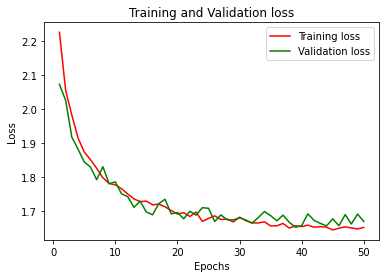

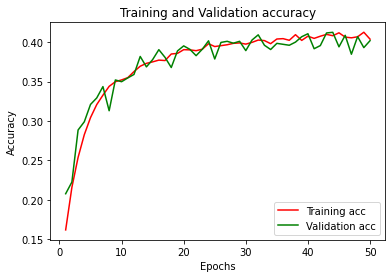

In [ ]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Evaluation

In [ ]:
# Printing the total training loss and accuracy

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 1.6530829668045044
Final training accuracy  0.4037555456161499


In [ ]:
# Printing the total validation loss and accuracy

print('Final Validation loss \t', history.history['val_loss'][-1])
print('Final Validation accuracy ', history.history['val_accuracy'][-1])

Final Validation loss 	 1.6704320907592773
Final Validation accuracy  0.4018000066280365


In [ ]:
# Printing the test loss and accuracy

testLoss, testAccuracy = Model_upd_dropout.evaluate( x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6423 - accuracy: 0.4125


In [ ]:
y_pred = Model_upd_dropout.predict_classes(x_test)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       909
           1       0.61      0.52      0.56      1188
           2       0.17      0.23      0.19       727
           3       0.31      0.25      0.28      1237
           4       0.36      0.34      0.35      1042
           5       0.41      0.33      0.36      1248
           6       0.36      0.50      0.42       713
           7       0.44      0.48      0.46       912
           8       0.57      0.49      0.53      1171
           9       0.43      0.51      0.47       853

    accuracy                           0.41     10000
   macro avg       0.41      0.42      0.41     10000
weighted avg       0.42      0.41      0.41     10000



In [ ]:
print(confusion_matrix(y_pred, y_true))

[[459  32 102  25  56  25   4  50 120  36]
 [ 56 613  44  42  12  29  23  32  85 252]
 [ 80  15 168  91 124  89  51  84  15  10]
 [ 40  33 104 313 129 200 236  90  37  55]
 [ 17  11 222  58 359  71 190  97   8   9]
 [ 28  42 142 272  80 406  77 114  66  21]
 [ 11  13  87  79  87  43 357  14   5  17]
 [ 42  19  79  53 109  72  37 441  11  49]
 [219  86  32  35  24  43  12  28 575 117]
 [ 48 136  20  32  20  22  13  50  78 434]]


## 2. Batch Size: Batch size is changed from 300 to 100.

### Model Building

In [ ]:
Model_upd_batch_size = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(32,kernel_regularizer = regularizers.l2(l2=0.001)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(32,kernel_regularizer = regularizers.l2(l2=0.001)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
  ])

Model_upd_batch_size.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                153650    
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1632      
_________________________________________________________________
activation_9 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_10 (Activation)   (None, 32)               

### Model Compilation

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

Model_upd_batch_size.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

### Model Training

In [ ]:
start_time = time.time()

history = Model_upd_batch_size.fit(x_train, y_train, epochs = 50, batch_size = 100, validation_split = 0.1)

print(f'Total training time is {time.time() - start_time} seconds')

Epoch 1/50
450/450 [==============================] - 1s 3ms/step - loss: 2.1093 - accuracy: 0.2204 - val_loss: 1.9494 - val_accuracy: 0.2656
Epoch 2/50
450/450 [==============================] - 1s 3ms/step - loss: 1.9484 - accuracy: 0.2727 - val_loss: 1.9561 - val_accuracy: 0.2772
Epoch 3/50
450/450 [==============================] - 1s 3ms/step - loss: 1.9204 - accuracy: 0.2868 - val_loss: 1.8961 - val_accuracy: 0.3008
Epoch 4/50
450/450 [==============================] - 1s 3ms/step - loss: 1.9051 - accuracy: 0.2940 - val_loss: 1.9219 - val_accuracy: 0.2728
Epoch 5/50
450/450 [==============================] - 1s 3ms/step - loss: 1.8936 - accuracy: 0.2984 - val_loss: 1.9220 - val_accuracy: 0.2932
Epoch 6/50
450/450 [==============================] - 1s 3ms/step - loss: 1.8877 - accuracy: 0.3007 - val_loss: 1.8826 - val_accuracy: 0.3148
Epoch 7/50
450/450 [==============================] - 1s 3ms/step - loss: 1.8802 - accuracy: 0.3031 - val_loss: 1.8632 - val_accuracy: 0.3124
Epoch 

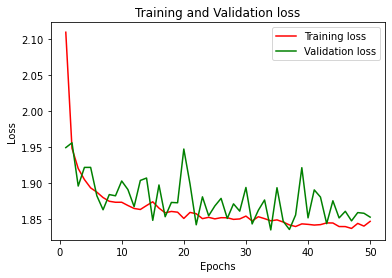

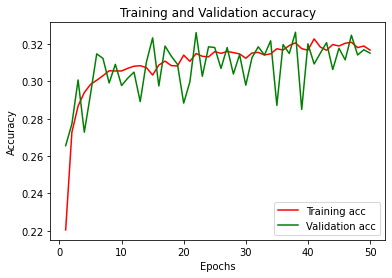

In [ ]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Evaluation

In [ ]:
# Printing the total training loss and accuracy

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 1.8471746444702148
Final training accuracy  0.3168444335460663


In [ ]:
# Printing the total validation loss and accuracy

print('Final Validation loss \t', history.history['val_loss'][-1])
print('Final Validation accuracy ', history.history['val_accuracy'][-1])

Final Validation loss 	 1.8530335426330566
Final Validation accuracy  0.31520000100135803


In [ ]:
# Printing the test loss and accuracy

testLoss, testAccuracy = Model_upd_batch_size.evaluate( x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8450 - accuracy: 0.3056


In [ ]:
y_pred = Model_upd_batch_size.predict_classes(x_test)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.14      0.39      0.21       375
           1       0.23      0.44      0.31       528
           2       0.01      0.23      0.01        30
           3       0.04      0.19      0.06       210
           4       0.15      0.23      0.18       660
           5       0.31      0.32      0.31       976
           6       0.59      0.32      0.41      1858
           7       0.52      0.31      0.39      1648
           8       0.52      0.31      0.39      1661
           9       0.54      0.26      0.35      2054

    accuracy                           0.31     10000
   macro avg       0.31      0.30      0.26     10000
weighted avg       0.45      0.31      0.35     10000



In [ ]:
print(confusion_matrix(y_pred, y_true))

[[145  11  51  14  21  14   3  38  62  16]
 [ 10 234  11  14   2  11   7   6  67 166]
 [  8   1   7   4   3   1   1   3   2   0]
 [ 11  24  14  39  14  26  23  18  23  18]
 [ 14  13 137  72 152  89 104  66   3  10]
 [ 28  35  75 247  64 309  93  52  59  14]
 [ 42  75 250 265 290 194 593  77  11  61]
 [ 81  44 245 144 299 172  78 519  20  46]
 [511 104 113  60  63  90  11  62 518 129]
 [150 459  97 141  92  94  87 159 235 540]]


# Comparison

When we moved the dropout layer after layer 3 with new dropout value of 0.2
the accuracy is negatively impacted. Similarly, when we changed the batch size from 300 to 100 the accuracy is going down and training time for model increases (doubled). The state of the art accuracy for this dataset is in the range of 99.5% achieved using ViT-H/14 model.